In [1]:
import time

from metrics import *
from RedistrictingMarkovChain import RedistrictingMarkovChain

from gerrychain import Graph
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [15]:
STEPS = [1000, 5000, 10000, 20000, 50000, 100000]

In [3]:
start_time = time.time()
print("Starting graph load")
ny_graph = Graph.from_file("./NY-lab/NY.shp")
print("Graph loaded")
end_time = time.time()

print(f"Graph load time: {(end_time - start_time) / 60} minutes")

Starting graph load


/Users/travisoleson/anaconda3/envs/ei/lib/python3.11/site-packages/gerrychain/graph/graph.py:388: UserWarning: Found islands (degree-0 nodes). Indices of islands: {134451, 134452}
  warnings.warn(
/Users/travisoleson/anaconda3/envs/ei/lib/python3.11/site-packages/gerrychain/graph/graph.py:262: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()


Graph loaded
Graph load time: 8.688479562600454 minutes


In [4]:
election = {"name": "G20PRE", "dem": "G20PRED", "rep": "G20PRER"}
pop_tol = 0.03

In [5]:
ny_markov_chain = RedistrictingMarkovChain(ny_graph,
                                                   26,
                                                   "CD",
                                                   election["name"],
                                                   election["dem"],
                                                   election["rep"],
                                                   "TOTPOP",
                                                   "HISP",
                                                   "BVAP",  # TODO
                                                   pop_tolerance=pop_tol)

In [6]:
def calc_metrics(initial_partition):
    
    part_mmd = mm(initial_partition, "G20PRE", "Democratic")
    part_eg = eg(initial_partition, "G20PRE")
    part_pb = pb(initial_partition, "G20PRE", "Democratic")

    return part_mmd, part_eg, part_pb

In [7]:
def get_init_part_vals(initial_partition):
    
    part_ce = ce(initial_partition)
    part_lmaj = md(initial_partition, "HISP")
    part_dwin = pd(initial_partition, "G20PRE", "Democratic")
    part_mmd = mm(initial_partition, "G20PRE", "Democratic")
    part_eg = eg(initial_partition, "G20PRE")
    part_pb = pb(initial_partition, "G20PRE", "Democratic")

    return part_ce, part_lmaj, part_dwin, part_mmd, part_eg, part_pb

In [8]:
def plot_histograms_nb(ensemble, filename, title, bins=10, format=False, xlabel=None, ylabel=None):
    plt.figure()
    plt.title(f"{title} Histogram")
    # plt.axvline(x=val, color="red", linestyle="--", linewidth=2, alpha=0.7)  # TODO add dynamic x
    if xlabel is not None and ylabel is not None:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    if format:
        # plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        plt.xticks(rotation=45, ha='right')
    plt.hist(ensemble, bins=bins, alpha=0.6, align="mid")  # left
    plt.savefig(filename)

### Proof of Concept

In [9]:
elec_name = election.get("name")

In [10]:
ny_init_state = ny_markov_chain.init_markov_chain(steps=200)

In [11]:
# ce_init, hisp_init, dem_init, mm_init, eg_init, pb_init = get_init_part_vals(ny_init_state.initial_state)

In [12]:
# mm_init, eg_init, pb_init = calc_metrics(ny_init_state.initial_state)

Walking the ensemble
Walk complete
Markov Chain time (steps=200): 0.07756975094477335 minutes


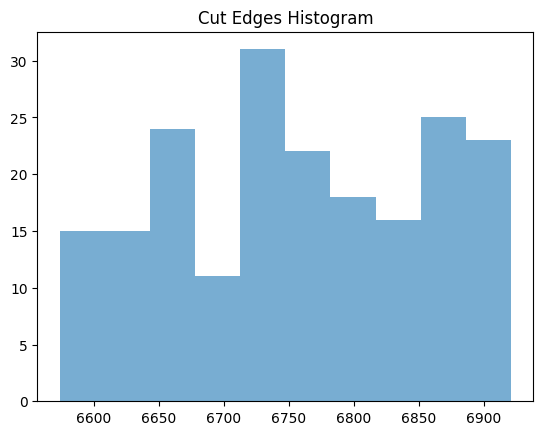

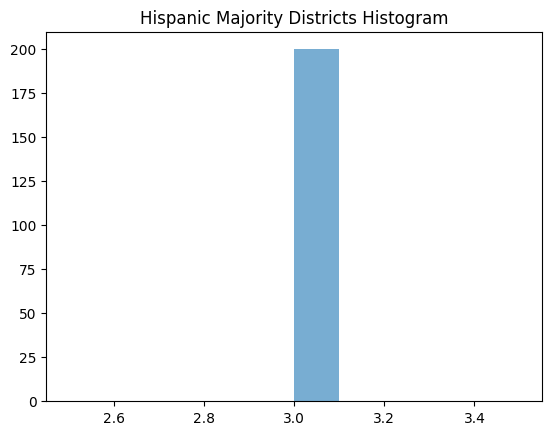

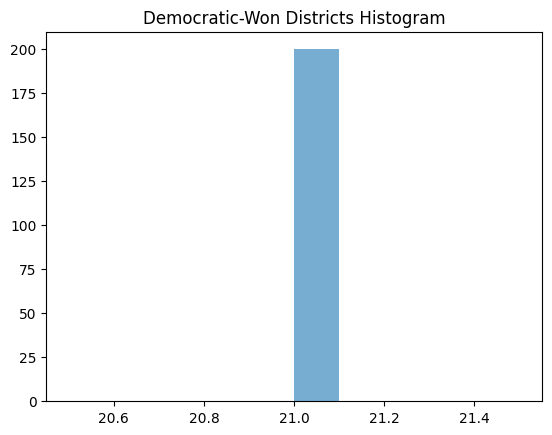

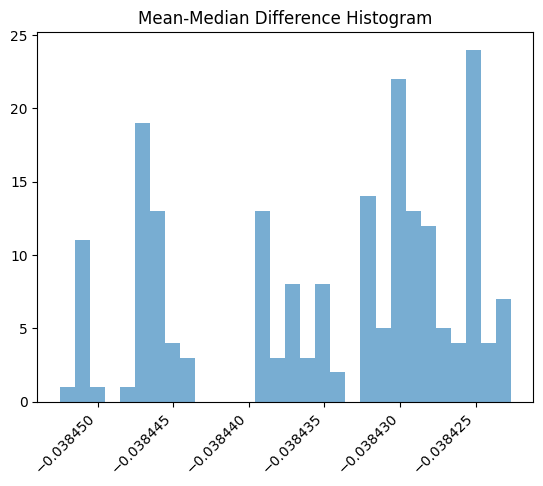

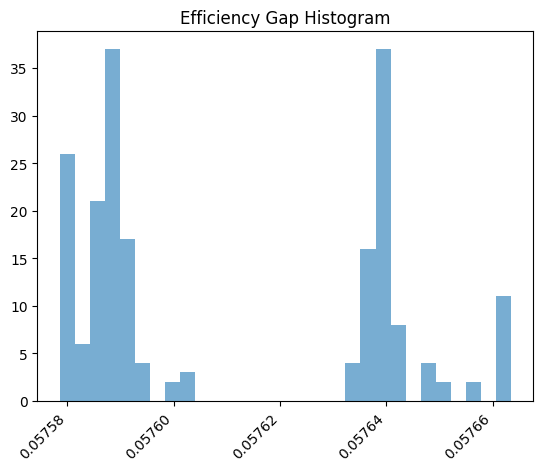

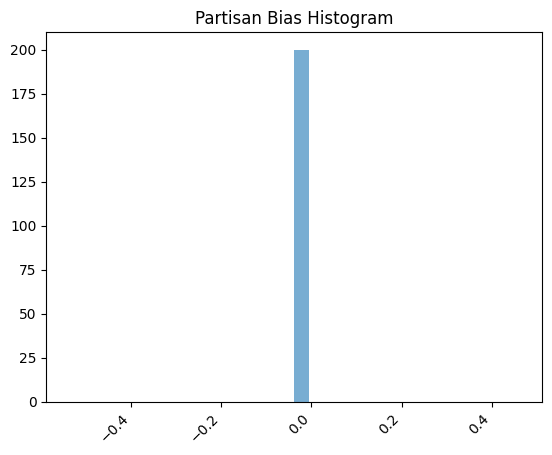

In [14]:
start_time = time.time()

cutedge_ensemble, lmaj_ensemble, dem_win_ensemble, mmd_ensemble, eg_ensemble, pb_ensemble = ny_markov_chain.walk_the_run()

# Save test histograms
# 1. Cut edge
plot_histograms_nb(cutedge_ensemble,
                f"histograms/test_cutedge_ensemble_200_{pop_tol}_{elec_name}.png",
                "Cut Edges",
                # ce_init,
               )
# 2. Majority-Latino districts
plot_histograms_nb(lmaj_ensemble,
                f"histograms/test_lmaj_ensemble_200_{pop_tol}_{elec_name}.png",
                "Hispanic Majority Districts",
                # hist_init,
               )
# 3. Democratic-won districts
plot_histograms_nb(dem_win_ensemble,
                f"histograms/test_dem_win_ensemble_200_{pop_tol}_{elec_name}.png",
                "Democratic-Won Districts",
                # dem_init,
               )
# 4. Mean-Median Difference
plot_histograms_nb(mmd_ensemble,
                f"histograms/test_mmd_ensemble_200_{pop_tol}_{elec_name}.png",
                "Mean-Median Difference",
                bins=30,
                format=True,
               )
# 5. Efficiency Gap
plot_histograms_nb(eg_ensemble,
                f"histograms/test_eg_ensemble_200_{pop_tol}_{elec_name}.png",
                "Efficiency Gap",
                bins=30,
                format=True,
               )
# 6. Partisan Bias
plot_histograms_nb(pb_ensemble,
                f"histograms/test_pb_ensemble_200_{pop_tol}_{elec_name}.png",
                "Partisan Bias",
                bins=30,
                format=True,
               )

end_time = time.time()
print(f"Markov Chain time (steps=200): {(end_time - start_time) / 60} minutes")

Walking the ensemble
Walk complete
Markov Chain time (steps=1000): 0.07416893243789673 minutes
Walking the ensemble
Walk complete
Markov Chain time (steps=5000): 0.07487209637959798 minutes
Walking the ensemble
Walk complete
Markov Chain time (steps=10000): 0.07085206906000772 minutes
Walking the ensemble
Walk complete


/var/folders/1j/xf7htd_s677f7vzgs7_y_11m0000gn/T/ipykernel_22485/851196444.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Markov Chain time (steps=20000): 0.07084211508433023 minutes
Walking the ensemble
Walk complete
Markov Chain time (steps=50000): 0.07356381813685099 minutes
Walking the ensemble
Walk complete
Markov Chain time (steps=100000): 0.07469775279362996 minutes


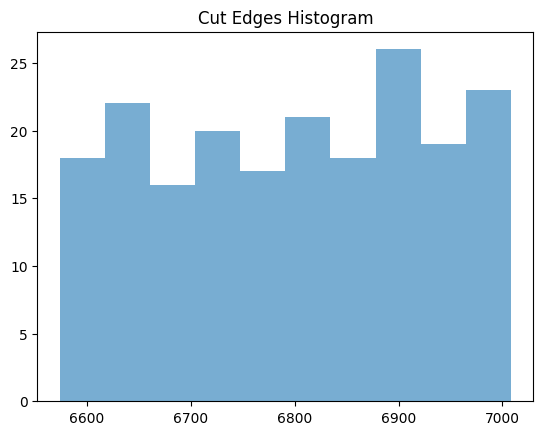

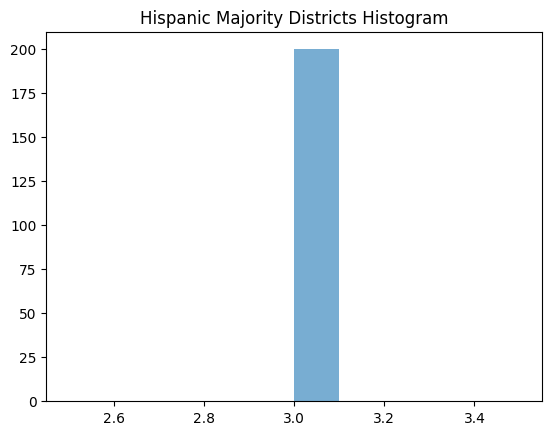

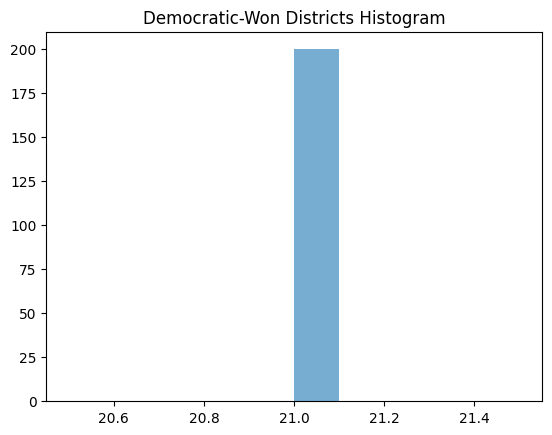

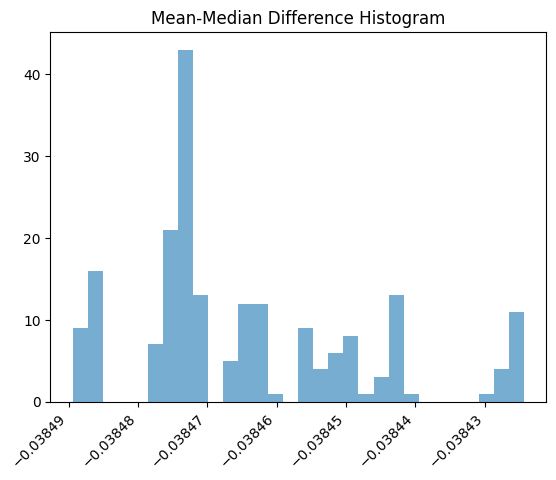

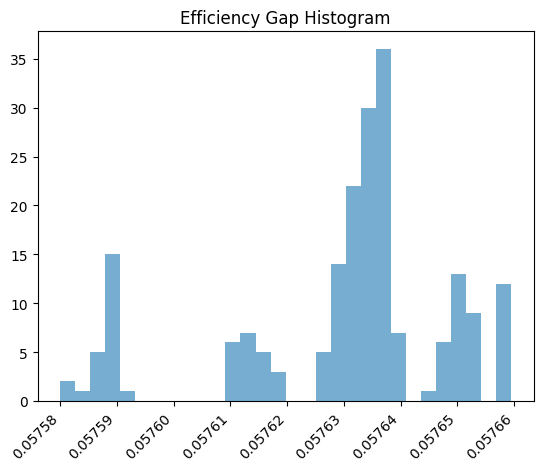

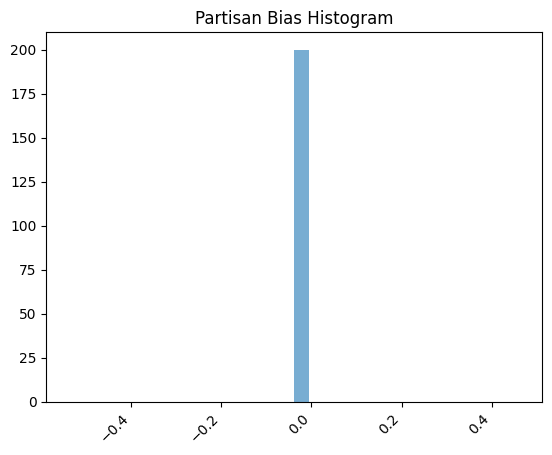

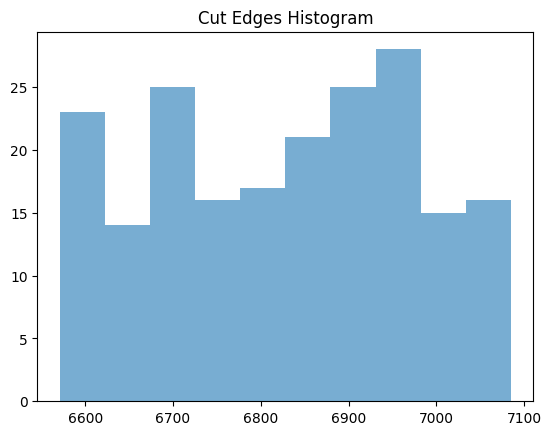

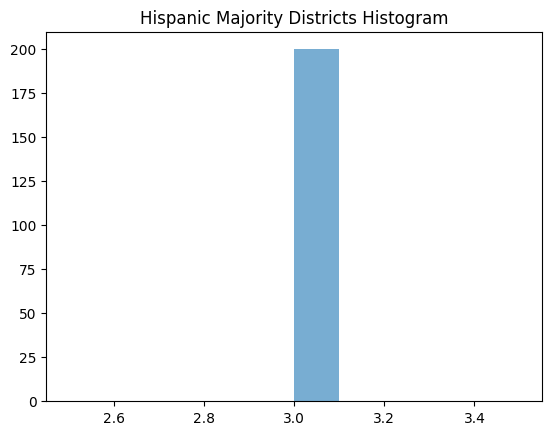

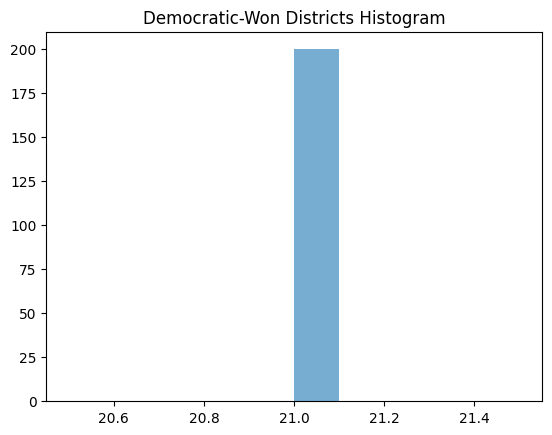

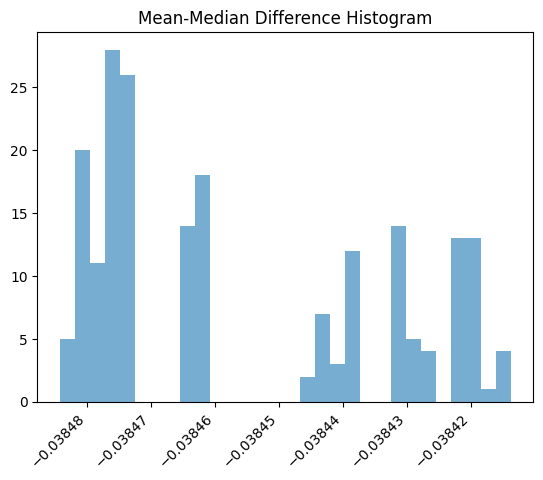

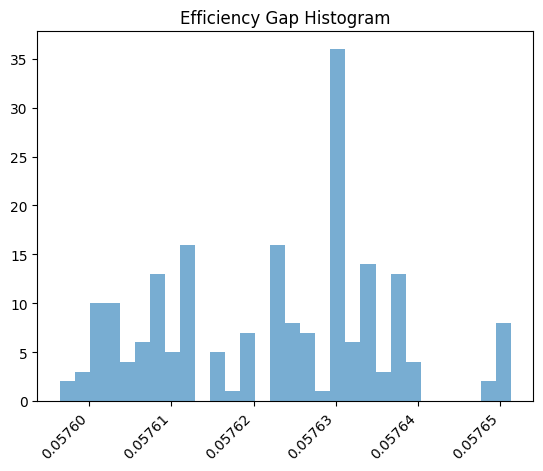

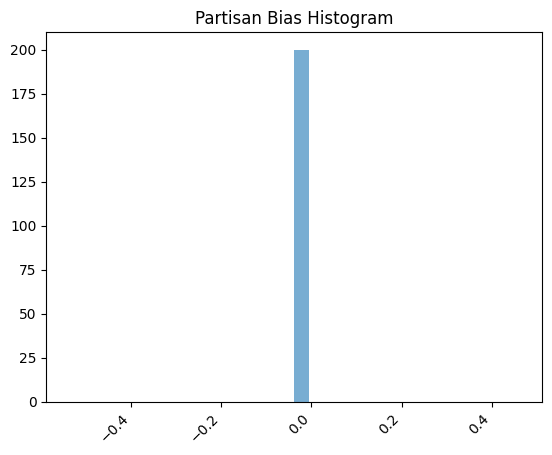

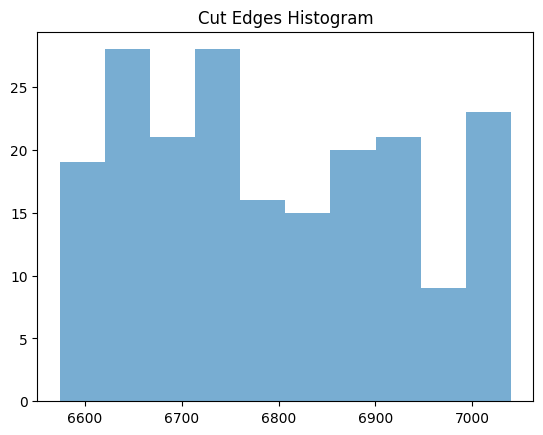

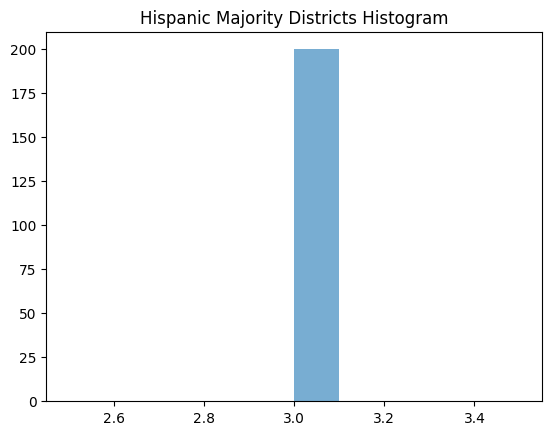

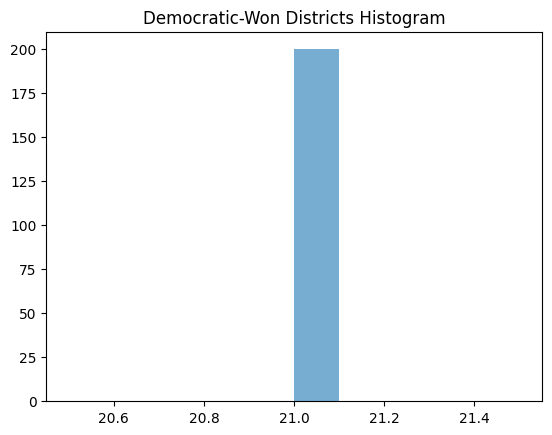

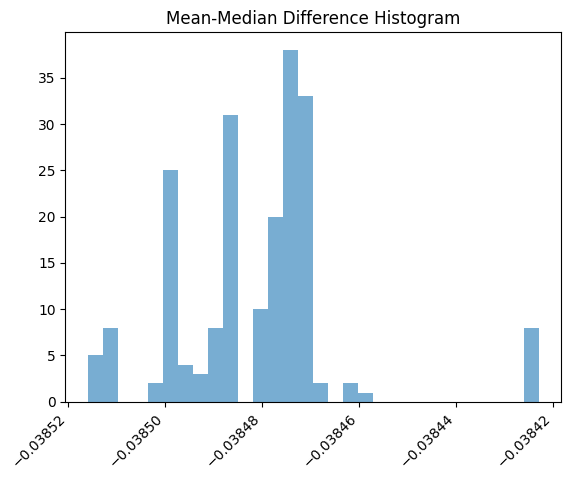

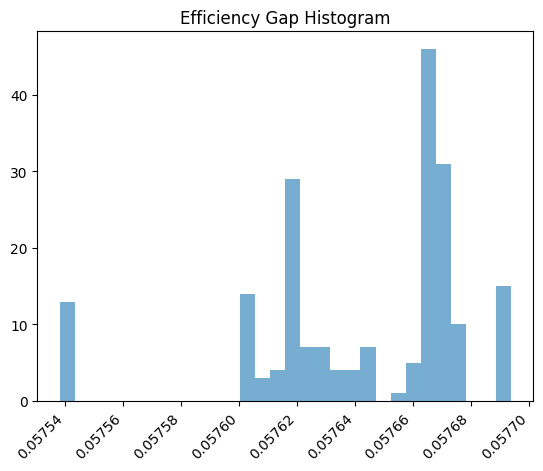

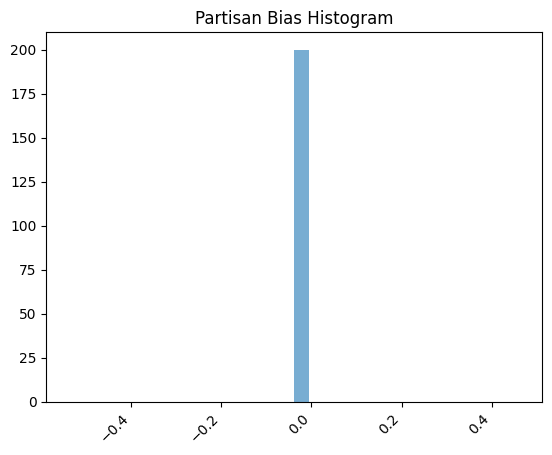

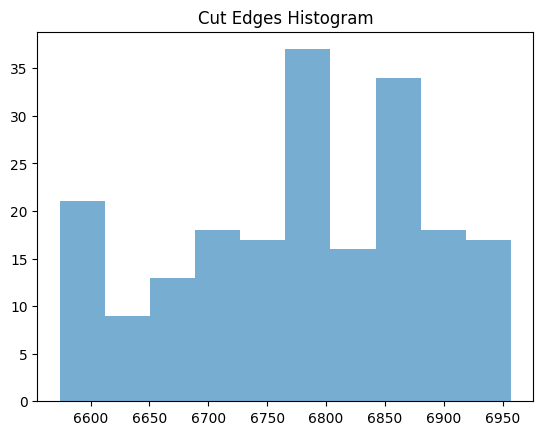

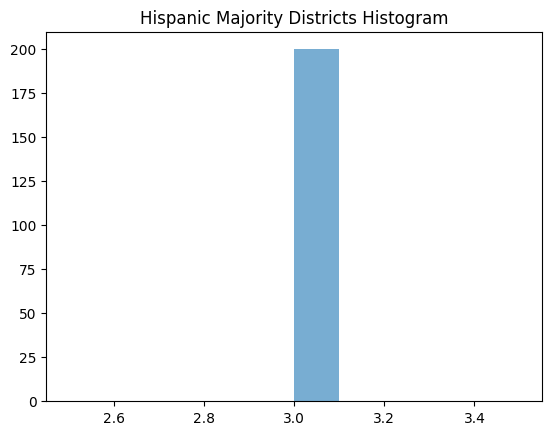

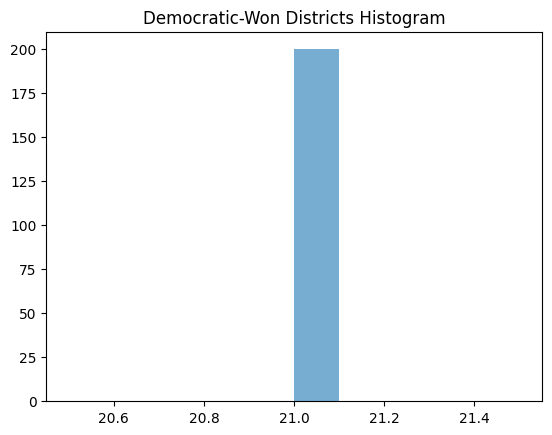

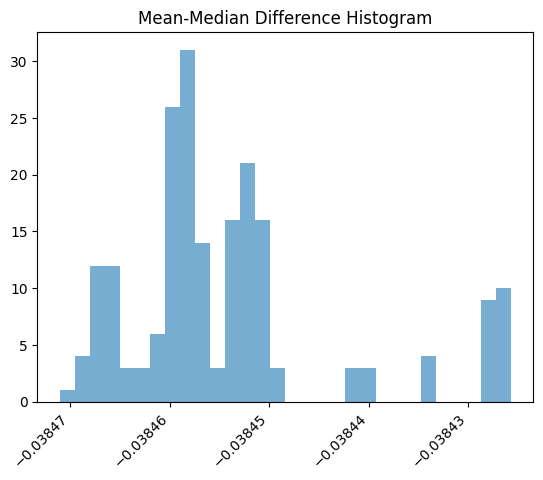

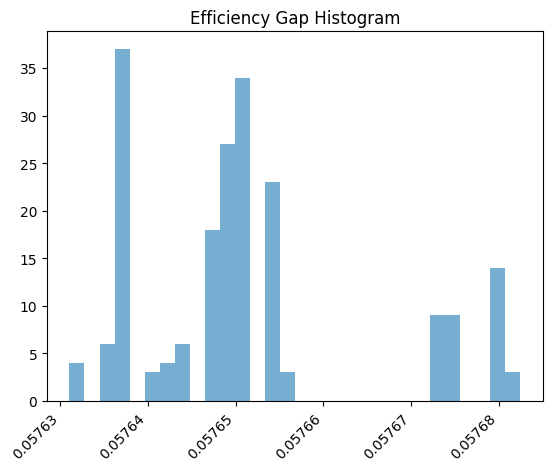

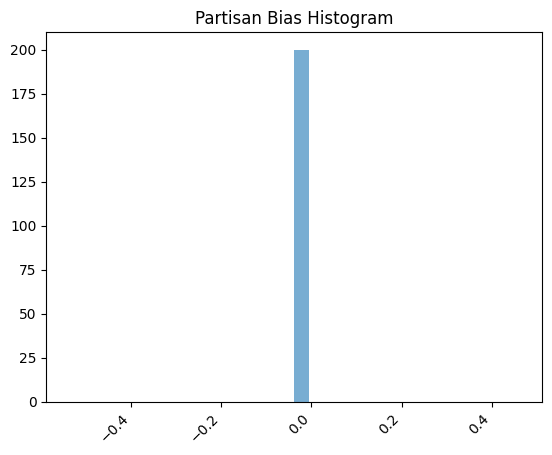

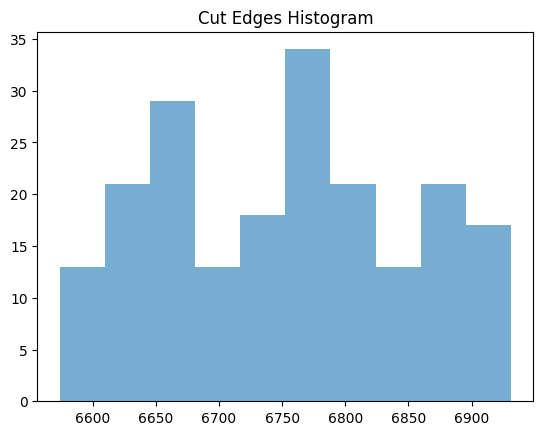

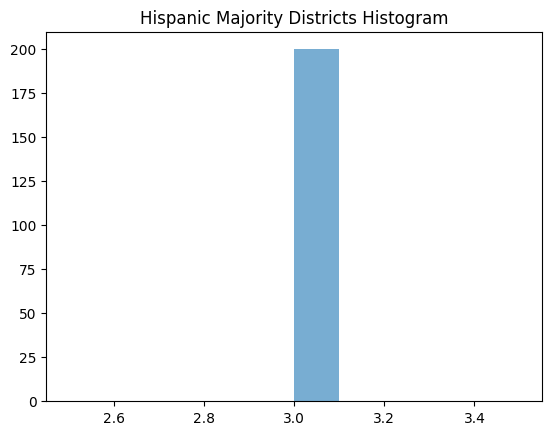

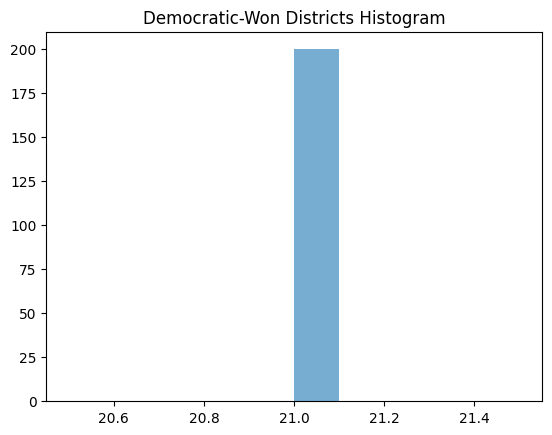

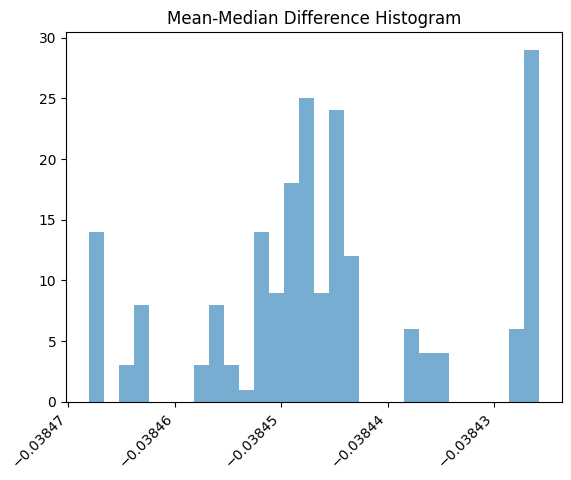

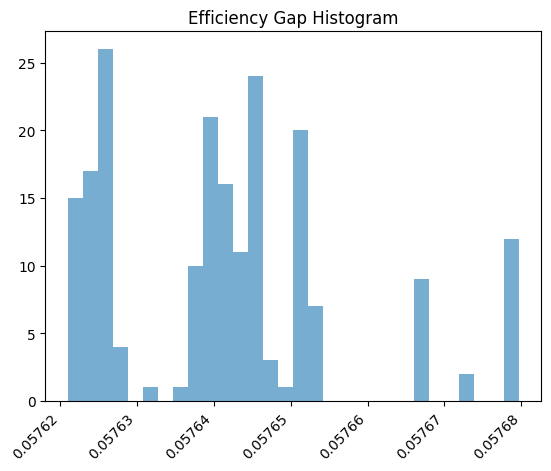

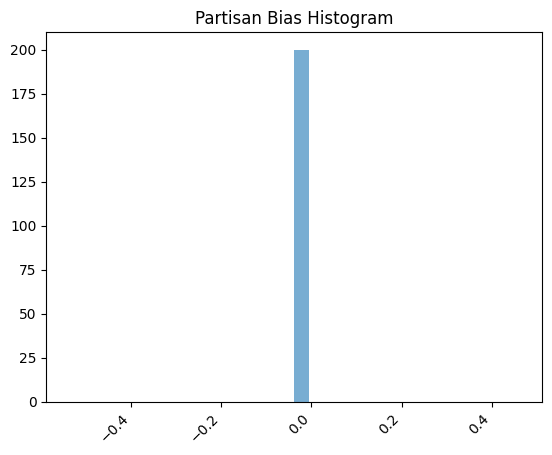

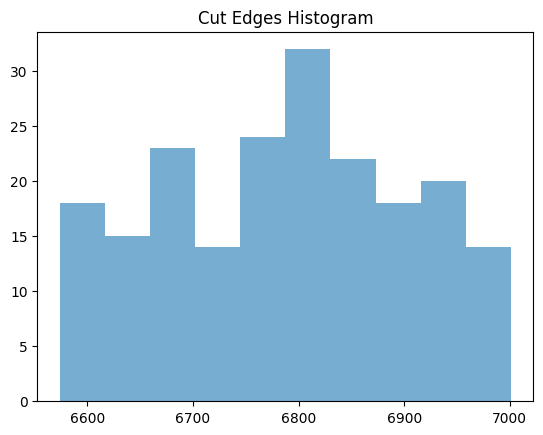

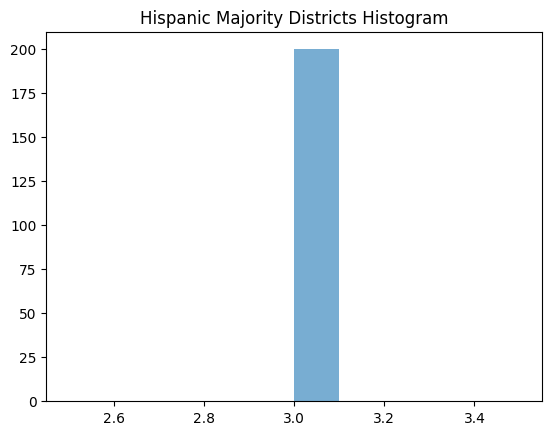

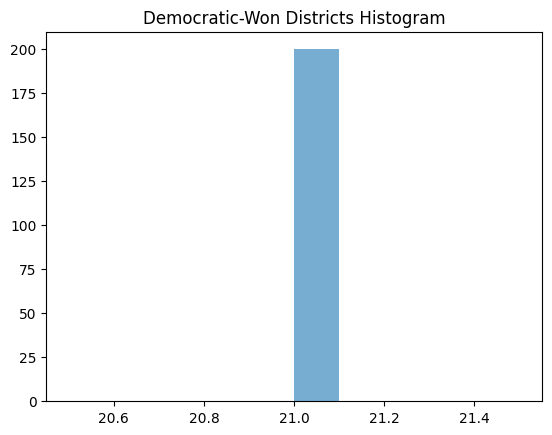

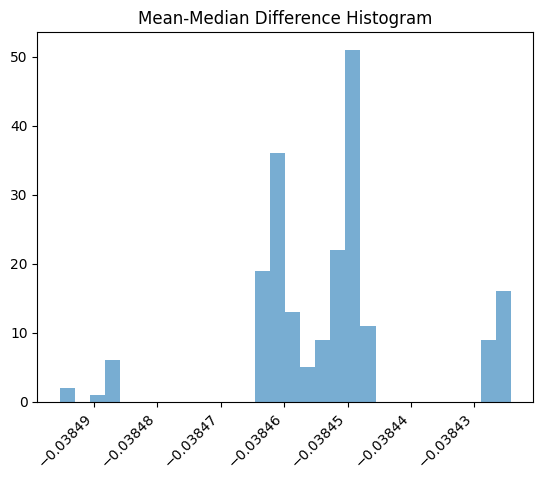

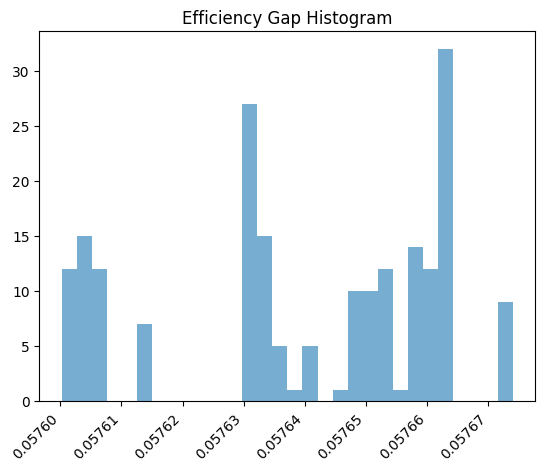

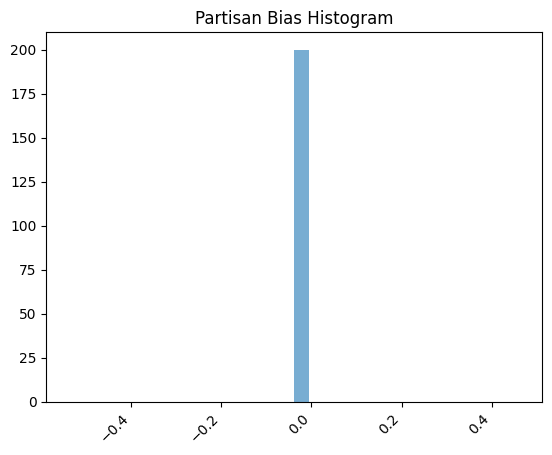

In [16]:
for step in STEPS:
    start_time = time.time()

    cutedge_ensemble, lmaj_ensemble, dem_win_ensemble, mmd_ensemble, eg_ensemble, pb_ensemble = ny_markov_chain.walk_the_run()
    
    # Save test histograms
    # 1. Cut edge
    plot_histograms_nb(cutedge_ensemble,
                    f"histograms/test_cutedge_ensemble_{step}_{pop_tol}_{elec_name}.png",
                    "Cut Edges",
                    # ce_init,
                   )
    # 2. Majority-Latino districts
    plot_histograms_nb(lmaj_ensemble,
                    f"histograms/test_lmaj_ensemble_{step}_{pop_tol}_{elec_name}.png",
                    "Hispanic Majority Districts",
                    # hist_init,
                   )
    # 3. Democratic-won districts
    plot_histograms_nb(dem_win_ensemble,
                    f"histograms/test_dem_win_ensemble_{step}_{pop_tol}_{elec_name}.png",
                    "Democratic-Won Districts",
                    # dem_init,
                   )
    # 4. Mean-Median Difference
    plot_histograms_nb(mmd_ensemble,
                    f"histograms/test_mmd_ensemble_{step}_{pop_tol}_{elec_name}.png",
                    "Mean-Median Difference",
                    bins=30,
                    format=True,
                   )
    # 5. Efficiency Gap
    plot_histograms_nb(eg_ensemble,
                    f"histograms/test_eg_ensemble_{step}_{pop_tol}_{elec_name}.png",
                    "Efficiency Gap",
                    bins=30,
                    format=True,
                   )
    # 6. Partisan Bias
    plot_histograms_nb(pb_ensemble,
                    f"histograms/test_pb_ensemble_{step}_{pop_tol}_{elec_name}.png",
                    "Partisan Bias",
                    bins=30,
                    format=True,
                   )
    
    end_time = time.time()
    print(f"Markov Chain time (steps={step}): {(end_time - start_time) / 60} minutes")